**Logistic Regression & Perceptron Comparison on Sonar Dataset by Aana Kakroo (20BAI1138)**

In [28]:
# importing required Python libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [29]:
#importing datasets  
df= pd.read_csv(r"C:\Users\aanak\OneDrive\Desktop\Materials for college\ML\LAB\sonar.csv") 
df 

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

<AxesSubplot:>

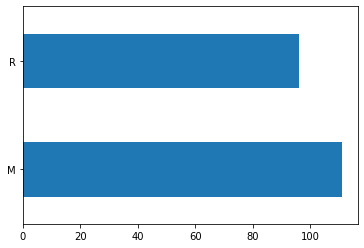

In [31]:
df['R'].value_counts().plot(kind='barh')

Split the inputs (first 59 columns) and targets (column 60 dummie data) for then use it as the model inputs and outputs.
First the inputs.

In [32]:
x = df.drop('R', axis=1)
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


Label encoding for the data in the 'R' column (target variable/output).

In [33]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'R'.
df['R']= label_encoder.fit_transform(df['R'])
 
y = df['R']

In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: R, Length: 207, dtype: int32

Splitting data for training and testing

In [35]:
#Import train test split
from sklearn.model_selection import train_test_split

#Split data in 60:40 (60% for training and 40% for testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

# Logistic Regression

Building Logistic Regression Model (taking penalty=l2)

In [76]:
#Import LogisticRegression class
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty='l2',random_state = 0)
classifier1.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [77]:
#do prediction using trained model
y_pred1 = classifier1.predict(X_test)

In [80]:
#import class for confusion matrix
from sklearn.metrics import confusion_matrix

#get confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
 
#print confusion matrix
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[36  9]
 [ 6 32]]


In [81]:
#import class for accuracy score
from sklearn.metrics import accuracy_score

#print accuracy score of model
print ("Accuracy : ", accuracy_score(y_test, y_pred1))

Accuracy :  0.8192771084337349


Building Logistic Regression Model (taking penalty=none, increasing max iterations from 100 to 150)

In [46]:
classifier2 = LogisticRegression(penalty='none',max_iter=150,random_state = 0)
classifier2.fit(X_train, y_train)

LogisticRegression(max_iter=150, penalty='none', random_state=0)

In [51]:
y_pred2 = classifier2.predict(X_test)

In [53]:
cm2 = confusion_matrix(y_test, y_pred2)
 
print ("Confusion Matrix : \n", cm2)

Confusion Matrix : 
 [[35 10]
 [ 7 31]]


In [54]:
print ("Accuracy : ", accuracy_score(y_test, y_pred2))

Accuracy :  0.7951807228915663


Building Logistic Regression Model (taking penalty=l1, changing solver from ‘lbfgs’ to ‘liblinear’)

In [55]:
classifier3 = LogisticRegression(penalty='l1',solver='liblinear',random_state = 0)
classifier3.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [56]:
y_pred3 = classifier3.predict(X_test)

In [57]:
cm3 = confusion_matrix(y_test, y_pred3)
 
print ("Confusion Matrix : \n", cm3)

Confusion Matrix : 
 [[36  9]
 [ 8 30]]


In [58]:
print ("Accuracy : ", accuracy_score(y_test, y_pred3))

Accuracy :  0.7951807228915663


Building Logistic Regression Model (taking penalty='elasticnet', keeping l1 ratio = 0.2, increasing max iterations to 200)

In [83]:
classifier4 = LogisticRegression(penalty='elasticnet',max_iter=200,l1_ratio=0.2,solver='saga',random_state = 0)
classifier4.fit(X_train, y_train)

y_pred4 = classifier4.predict(X_test)

cm4 = confusion_matrix(y_test, y_pred4)
print ("Confusion Matrix : \n", cm4)

print ("Accuracy : ", accuracy_score(y_test, y_pred4))

Confusion Matrix : 
 [[36  9]
 [ 6 32]]
Accuracy :  0.8192771084337349


Building Logistic Regression Model (taking penalty='elasticnet', keeping l1 ratio = 0.6)

In [75]:
classifier5 = LogisticRegression(penalty='elasticnet',l1_ratio=0.6,solver='saga',random_state = 0)
classifier5.fit(X_train, y_train)

y_pred5 = classifier5.predict(X_test)

cm5 = confusion_matrix(y_test, y_pred5)
print ("Confusion Matrix : \n", cm5)

print ("Accuracy : ", accuracy_score(y_test, y_pred5))

Confusion Matrix : 
 [[35 10]
 [ 9 29]]
Accuracy :  0.7710843373493976


C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


As we can see from above, the highest accuracy score obtained from Logistic Regression Model from the given dataset is 0.8192771084337349 which we achieved by taking penalty = l2, random state = 0 and by taking penalty='elasticnet', keeping l1 ratio = 0.2, increasing max iterations to 200.
Thus, the above mentioned models are most suited to be deployed on the given dataset.

# Perceptron

Taking default parameters

In [89]:
#import Perceptron class
from sklearn.linear_model import Perceptron

#build model
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x, y)
clf.score(x, y)

0.7681159420289855

Taking penalty=l1

In [91]:
clf1 = Perceptron(penalty='l1',tol=1e-3, random_state=0)
clf1.fit(x, y)
clf1.score(x, y)

0.8067632850241546

Taking penalty=l2

In [92]:
clf2 = Perceptron(penalty='l2',tol=1e-3, random_state=0)
clf2.fit(x, y)
clf2.score(x, y)

0.7632850241545893

Taking penalty=elasticnet and l1 ratio=0.2

In [102]:
clf3 = Perceptron(penalty='elasticnet',l1_ratio=0.2,tol=1e-3, random_state=0)
clf3.fit(x, y)
clf3.score(x, y)

0.8599033816425121

Taking same parameters as above but changing class weight to balanced

In [103]:
clf4 = Perceptron(penalty='elasticnet',l1_ratio=0.2,tol=1e-3, random_state=0,class_weight='balanced')
clf4.fit(x, y)
clf4.score(x, y)

0.855072463768116

We can observe that the highest possible accuracy score obtained is 0.8599033816425121 when taking parameters as penalty='elasticnet',l1_ratio=0.2,tol=1e-3, random_state=0. Hence, the mentioned perceptron model is the most suited for the given sonar dataset.